# Vorlesung Python 3 (numpy) - 06.01.2021

Diese Vorlesung soll eine Einführung in die Arbeit mit wissenschaftlichen Daten sein. Anhand eine kleiner Geschichte werden auf der einen Seite die sog. `numpy`-Arrays eingeführt, aber auch gleich die visuelle Darstellung mit Hilfe der `matplotlib`-Bibliothek.

# Vorgeschichte

In vielen Beispielen haben wir von der Studentin Annika geredet, die als Studentin der Physik und Astronomie einige Aufgaben mit Linux und auch mit Python erledigt hat. In dieser Vorlesung geht es um das Fahrzeug der Studentin einen kleinen Elektro-PKW eines bekannten französischen Autoherstellers. 

Gründlich, wie Annika nun ist, hat Sie in dem vergangenen Jahr, den Stromverbrauch und die gefahrenen Kilometer pro Woche in einer Datei notiert.

In [68]:
!head -15 data/test.dat

# week	  power	 distance
0  	  61.1	 278.3
1  	  58.3	 257.1
2  	  60.3	 274.4
3  	  52.1	 253.2
4  	  55.9	 266.8
5  	  59.3	 279.2
6  	  54.6	 269.0
7  	  36.1	 173.5
8  	 145.0	 744.5
9  	 116.4	 623.5
10 	 115.1	 591.6
11 	  43.5	 235.1
12 	  28.5	 154.3
13 	  49.8	 268.4


Wie man gut sieht, ist in der ersten Spalte die Wochennummer von `0` an eingetragen. Dann folgt in der ersten Spalte der Verbrauch in `kW/h` und in der 3. Spalte die gefahrene Strecke in `km`.

Annika möchte diese Daten nun genauer analysieren.

# Daten einlesen

Der folgende Code ist ein wenig Standard, es wird eine Datei in die Variable `data` eingelesen und dann werden die Spalten in separate Variablen abgespeichert. Was es im Detail bedeutet, wird später klar werden!

In [69]:
import numpy as np

data = np.loadtxt('data/test.dat')

data_weeks = data[:,0]
data_power = data[:,1]
data_range = data[:,2]

# Numpy-Arrays

Bevor wir in der Geschichte weitergehen, müssen wir über die `numpy`-Arrays sprechen.

`numpy`-Arrays sind Container (wie Strings), in denen alle Elemente den (meistens) gleichen Typ haben. Typen können z.B. Ganzzahlen oder Fliesskommazahlen sein.

### Meta-Daten

Wichtig bei den Arrays sind die sog. Meta-Daten, die das Array beschreiben:

In [70]:
print(type(data_power))    # type of the python array
print(data_power.dtype)    # data type of the array
print(data_power.ndim)     # number of dimensions
print(data_power.shape)    # shape of the array

<class 'numpy.ndarray'>
float64
1
(52,)


### Erstellung von Arrays

In [71]:
import numpy as np

# there are many possibilities to create a numpy-array
a1 = np.array([1,2,3,4])       # conversion of a numerical list to a numpy-array
a2 = np.array([1., 2., 3., 4.])
print(a1)
print(a2)
b = np.arange(0.0, 1.0, 0.1)  # array between two limits with a given distance
                              # between array elements. The array if a half-open
                              # interval!
print(b)
c = np.linspace(0.0, 1.0, 10) # array between two limits with a given number of
                              # array elements. Both limits are contained in the
                              # array
print(c)
d = np.zeros(10)              # array of 10 elements with 0 
print(d)

[1 2 3 4]
[1. 2. 3. 4.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


`numpy` erzeugt automatisch den richtigen Datentyp, man kann aber auch den Datentyp *forcieren*:

In [72]:
a1 = np.array([1,2,3,4], dtype=np.float64)
print(a1)

[1. 2. 3. 4.]


Wichtige Typen:
  * `np.int64`    64-bit Ganzzahlen
  * `np.float64`  64-bit Fliesskommazahlen
  
(Ganzzahlen in `numpy` haben eine beschränkte Genauigkeit!)

Wie bei allen Containern kann man mit `len` die Größe des Arrays abfragen, allerdings sollte `shape` bevorzugt werden.

# Erste Datenanalyse

Wir haben nun drei `numpy`-Arrays aus der Text-Datei eingelesen:

In [73]:
print(data_weeks.shape)
print(data_power.shape)
print(data_range.shape)

(52,)
(52,)
(52,)


Alle Größen sind identisch, so dass man die Wochen gegen den Stromverbrauch  plotten kann:

Text(0, 0.5, 'Power [kWh]')

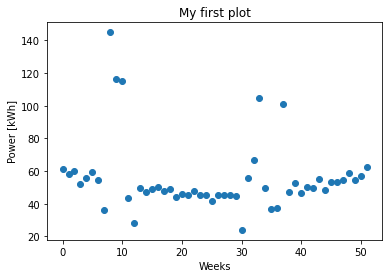

In [79]:
%matplotlib inline    

import matplotlib.pyplot as plt     # import the matplotlib

fig, ax = plt.subplots()            # generate a figure with an axis!

ax.scatter(data_weeks, data_power)  # scatter plot
#ax.plot(data_weeks, data_power)     # line plot
ax.set_title('My first plot')       # sets a main title
ax.set_xlabel('Weeks')              # sets a label on the x axis
ax.set_ylabel('Power [kWh]')          # sets a label on the y axis

oder die Wochen gegenüber den gefahrenden Kilometern:

Text(0, 0.5, 'Distance km')

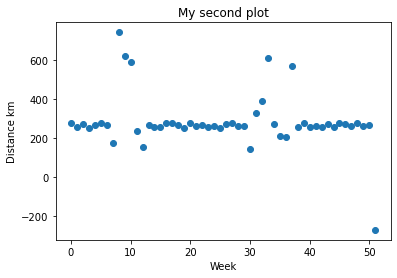

In [80]:
%matplotlib inline    

import matplotlib.pyplot as plt     # import the matplotlib

fig, ax = plt.subplots()            # generate a figure with an axis!

ax.scatter(data_weeks, data_range)  # scatter plot
#ax.plot(data_weeks, data_range)     # line plot
ax.set_title('My second plot')      # sets a main title
ax.set_xlabel('Week')               # sets a label on the x axis
ax.set_ylabel('Distance km')        # sets a label on the y axis

# Zugriff auf einzelne Elemente

Schauen wir uns mal das Array für den Verbrauch an:

In [81]:
print(data_power)

[ 61.1  58.3  60.3  52.1  55.9  59.3  54.6  36.1 145.  116.4 115.1  43.5
  28.5  49.8  47.4  48.8  50.4  47.8  49.2  44.2  46.2  45.5  47.7  45.3
  45.5  41.4  45.6  45.5  45.1  44.9  24.   55.5  67.  104.9  49.4  36.8
  37.7 101.2  47.1  52.5  46.7  50.5  49.5  55.   48.4  53.4  53.2  54.8
  59.1  54.5  56.8  62.6]


Einzelne Elemente bekommt man wie bei den Strings:

In [82]:
print(data_power[1])  # the second element
print(data_power[-1]) # the last element
print(data_power[60]) # out of range!

58.3
62.6


IndexError: index 60 is out of bounds for axis 0 with size 52

Positive Indices gehen von `0` bis zur `Länge-1` und negative Indices von `-1` bis `-Länge`. Wie bei den Strings hilft für das Verständnis der Restoperator `%`.

# Slicing von Arrays

Slicing geht analog zu den Strings:

In [83]:
print(data_power)

[ 61.1  58.3  60.3  52.1  55.9  59.3  54.6  36.1 145.  116.4 115.1  43.5
  28.5  49.8  47.4  48.8  50.4  47.8  49.2  44.2  46.2  45.5  47.7  45.3
  45.5  41.4  45.6  45.5  45.1  44.9  24.   55.5  67.  104.9  49.4  36.8
  37.7 101.2  47.1  52.5  46.7  50.5  49.5  55.   48.4  53.4  53.2  54.8
  59.1  54.5  56.8  62.6]


In [84]:
print(data_power[1:10])    # forward counting
print(data_power[5:1])     # indices wrong for forward counting
print(data_power[5:1:-1])  # backward counting
print(data_power[1:10:2])  # every second element

[ 58.3  60.3  52.1  55.9  59.3  54.6  36.1 145.  116.4]
[]
[59.3 55.9 52.1 60.3]
[ 58.3  52.1  59.3  36.1 116.4]


Anfang, Ende und der Step sind optional. Wenn keine Elemente addressiert werden können, wird ein leeres Array zurückgegeben.

Ausgeschnittene Arrays sind wiederum Arrays:

In [85]:
cut = data_power[1:10]

print(type(cut))
print(cut.dtype)
print(cut.shape)

<class 'numpy.ndarray'>
float64
(9,)


# Verändern von Elementen

Wenn man sich den Plot für die gefahrenden Kilometer anschaut, dann findet man, dass ein Wert *komisch* ist:

Text(0, 0.5, 'Distance km')

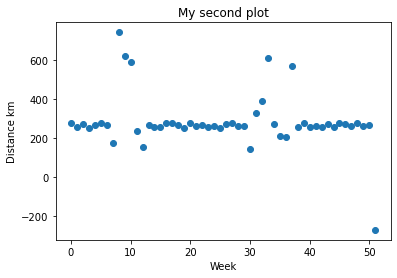

In [86]:
%matplotlib inline    

import matplotlib.pyplot as plt     # import the matplotlib

fig, ax = plt.subplots()            # generate a figure with an axis!

ax.scatter(data_weeks, data_range)  # scatter plot
ax.set_title('My second plot')      # sets a main title
ax.set_xlabel('Week')               # sets a label on the x axis
ax.set_ylabel('Distance km')        # sets a label on the y axis

Schauen wir uns deswegen die Daten einmal genauer an:

In [87]:
print(data_range)

[ 278.3  257.1  274.4  253.2  266.8  279.2  269.   173.5  744.5  623.5
  591.6  235.1  154.3  268.4  260.3  260.   279.2  276.9  269.1  254.7
  275.9  261.9  266.8  260.   263.1  251.8  271.8  276.2  264.6  264.7
  143.2  330.7  393.2  612.1  273.7  212.7  204.7  568.9  255.6  277.4
  258.5  265.1  259.   271.8  255.5  275.9  271.3  264.7  277.6  262.3
  265.7 -270.7]


Wie man sieht, scheint es in der Datendatei einen Fehler gegeben zu haben. Der Wert für die 52. Woche (Index=51) ist negativ, obwohl er positiv sein sollte. Natürlich kann man die Datei händisch ändern, aber wir wollen das in Python machen:

In [88]:
print(data_range[51])
data_range[51] = - data_range[51]
print(data_range[51])

-270.7
270.7


In `numpy`-Arrays lassen sich Elemente verändern, dazu adressiert man das Element auf der linken Seite und weist dem Element einen neuen Wert zu! Dieses Feature ist aber nicht bei allen Container-Typen verfügbar, siehe Strings!

Schauen wir nun den Plot nochmal an, nun sieht er wieder gut aus!

Text(0, 0.5, 'Distance km')

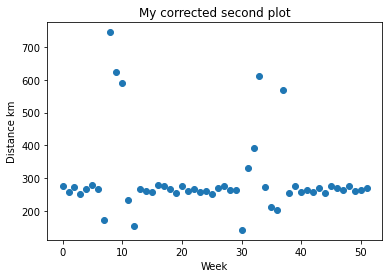

In [89]:
%matplotlib inline    

import matplotlib.pyplot as plt     # import the matplotlib

fig, ax = plt.subplots()            # generate a figure with an axis!

ax.scatter(data_weeks, data_range)  # scatter plot
ax.set_title('My corrected second plot')      # sets a main title
ax.set_xlabel('Week')               # sets a label on the x axis
ax.set_ylabel('Distance km')        # sets a label on the y axis

Man kann auch mehrere Elemente gleichzeitig verändern:

In [90]:
a = np.array([1,2,3,4,5,6])     # ein Ganzzahlen-Array
print(a[2:5])                   # ein Ausschnitt
a[2:5] = 100                    # alle Werte werden mit einem Wert überschrieben
print(a)
a[2:5] = np.array([10,20,30])   # Zuweisung mit einem Array gleicher Länge
print(a) 

[3 4 5]
[  1   2 100 100 100   6]
[ 1  2 10 20 30  6]


**Wichtig**: Werden mehrere Elemente verändert, muss auf der rechten Seite entweder ein einzelner Wert oder ein `numpy`-Array gegeben werden. Die Länge des Arrays muss mit der Länge des Arrays auf der linken Seite identisch sein.

# Rechnen mit Arrays

Nachdem wir die Daten mit Plots visualisiert haben, wollen wir mit den Daten ein wenig rechnen.

Aus dem Strom-Gesammtverbrauch und der gefahrenen Entfernung lässt sich analog zum Benzinverbrauch ein Durchschnittsverbrauch pro 100km berechnen:

In [91]:
consumption = data_power / data_range   # consumption per km
consumption = consumption * 100         # consumption per 100 km 

Hier werden die **gleichlangen** Arrays `data_power`und `data_range` jeweils elementweise durcheinander geteilt. In einem zweiten Schritt wird das neue Array `consumption` elementweise mit `100` multipliziert. Bitte nie Schleifen wie in C benutzen!

Das Ergebnis ist:

Text(0, 0.5, 'consumption $[\\frac{KWh}{100km}]$')

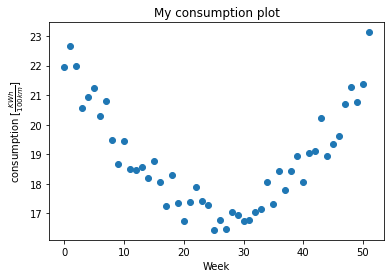

In [96]:
%matplotlib inline    

import matplotlib.pyplot as plt     # import the matplotlib

fig, ax = plt.subplots()            # generate a figure with an axis!

ax.scatter(data_weeks, consumption)                 # scatter plot
ax.set_title('My consumption plot')                 # sets a main title
ax.set_xlabel(r'Week')                               # sets a label on the x axis
ax.set_ylabel(r'consumption $[\frac{KWh}{100km}]$') # sets a label on the y axis

Auch die `numpy`-Funktionen können auf Arrays angewendet werden:

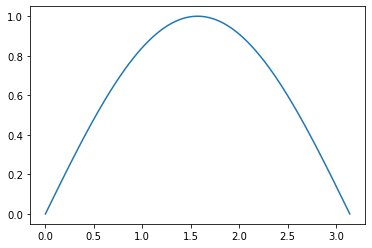

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0,np.pi,100)     # 100 values from 0 to pi
y = np.sin(x)                    # calculate the sin for x

# plot the results
fig, ax = plt.subplots()
ax.plot(x,y)

Auch Vergleiche funktionieren elementweise:

In [98]:
a = np.array([1,2,3,4,5,6])
print(a > 3)

[False False False  True  True  True]


# ,,Kopieren'' von Arrays

**Wichtig:** Vorsicht beim Kopieren von Arrays:

In [100]:
a = np.array([1,2,3,4])
b = a                     # creates not a clone but a new view on the same data!
b[0] = 100                # manipulates b and also a!
print(a)
print(b)


a = np.array([1,2,3,4])   
b = a[0:2]                # creates a sub-view on the same data
b[1] = 100                # manipulates b and also a!
print(a)
print(b)

a = np.array([1,2,3,4])   
b = 1*a                   # creates a new array!
b[0] = 100                # manipulates only a
print(a)
print(b)

[100   2   3   4]
[100   2   3   4]
[  1 100   3   4]
[  1 100]
[1 2 3 4]
[100   2   3   4]


# Zusammenfassung des Rechnens
 * mit Arrays wie mit Zahlen rechnen, es gelten die gleichen Regeln
 * Rechnen mit Arrays geht immer elementweise
 * Arrays können mit Zahlen verarbeitet werden
 * Arrays können mit gleichlangen Arrays verarbeitet werden
 * `numpy`-Funktionen arbeiten auf Arrays
 * Array-Operationen **nie** mit Schleifen ausführen!!
 
Und jede Array-Operation erzeugt ein neues Array! Eine Zuweisung oder Slicing nur einen neue View auf die gleichen Daten! 

# Funktionen mit Arrays

Wie bei den Strings haben auch Arrays angeheftete Funktionen, die über die Array-Variablen aufgerufen werden können. 

Zum Beispiel möchte unsere Studentin Annika wissen, welchen Durchschnittsverbrauch sie in den ersten 8 Wochen gehabt hat oder wieviele Kilometer sie insgesammt gefahren ist oder welches ihre längste Entfernung gewesen ist:

In [101]:
consumption_8weeks = consumption[:8]  # cut the first 8 weeks
print(consumption_8weeks)

print(consumption_8weeks.mean())      # mean of the consumption in the first 8 weeks

print(data_range.sum())               # the sum of all distances
print(data_range.max())               # maximum of all distances

[21.95472512 22.67600156 21.97521866 20.57661927 20.95202399 21.23925501
 20.29739777 20.80691643]
21.30976972539394
15396.200000000003
744.5


Es gibt noch viele andere Funktionen, die direkt auf den Arrays arbeiten. Einige geben Werte zurück, andere können auch das Array verändern (im Gegensatz zu den String-Funktionen!).

# Algorithmen mit Arrays

Eine Idee, die Annika umsetzen möchte, ist die Beantwortung der Frage, wie sich ihr Verbrauch von Woche zu Woche verändert hat:

Eine Lösung ist, dass man von dem Verbrauchsarray $f$ stückweise die die 1. Ableitung bildet 
$f_i = \frac{f(x_{i+1})-f(x_{i}}{x_{i+1}-x_{i}}$. Mit Arrays lässt sich das in einem Schritt erledigen, in dem man das Array $f$ mit Hilfe von Slicing um eine Position verschiebt und dann elementweise voneinander abzieht. Die Differenz der $x$-Werte ist immer `1` !

<BarContainer object of 51 artists>

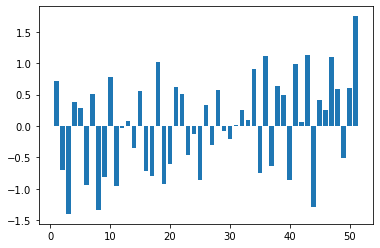

In [104]:
%matplotlib inline

import matplotlib.pyplot as plt

cons_diff = consumption[1:] - consumption[:-1]

# plot the results
fig, ax = plt.subplots()
ax.bar(data_weeks[1:], cons_diff)    # use a bar plot visualizing the diffs

Wichtig ist hierbei, dass das neue Array ein Element weniger hat und deswegen beim Plotten man eine andere Zählung vornehmen muss. In unserem Fall kann man argumentieren, dass für die Woche mit Index $i$ die Differenz der Werte $f_{i-1}$ und $f_{i}$ massgeblich sein sollen!

# 2d-Numpy-Arrays

Zum Abschluss greife ich nochmal das Einlesen vom Anfang auf:

In [105]:
import numpy as np

data = np.loadtxt('data/test.dat')

Schaut man sich die Metadaten des `data`-Arrays an, so sieht man:

In [106]:
print(data.ndim)    # more than 1 dimension
print(data.shape)   # 52 rows and 3 colums

2
(52, 3)


Dieses ist ein 2d-Array, welches in die einzelnen Spalten zerlegt werden soll. Im Prinzip wird bei 2d-Arrays das Indizieren und Slicing um eine weitere Komponente erweitert, wobei jede Dimension durch ein `,` getrennt wird:

In [107]:
print(data[0])       # write the complete 1st row
print(data[0,0])     # write the element of the 1st row and 1st column
print(data[:,0])     # write the first column
print(data[1:3,1])   # write the second column of the second row to the third row

[  0.   61.1 278.3]
0.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]
[58.3 60.3]


Das Ergebnis des 2d-Slicings kann je nach dem Slicing-Vorgang ein Wert, ein 1d-Array oder ein 2d-Array sein!